In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("/content/uber - uber.csv")
df

,dispatching_base_number,date,active_vehicles,trips
0,B02512,01-01-2015,190,1132
1,B02765,01-01-2015,225,1765
2,B02764,01-01-2015,3427,29421
3,B02682,01-01-2015,945,7679
4,B02617,01-01-2015,1228,9537
...,...,...,...,...
349,B02764,2/28/2015,3952,39812
350,B02617,2/28/2015,1372,14022
351,B02682,2/28/2015,1386,14472
352,B02512,2/28/2015,230,1803


In [6]:
df['date'] = pd.to_datetime(df['date'], format='mixed', dayfirst=False, errors='coerce')

df['day_of_week'] = df['date'].dt.day_name()
df['weekday_num'] = df['date'].dt.weekday
df

,dispatching_base_number,date,active_vehicles,trips,day_of_week,weekday_num
0,B02512,2015-01-01,190,1132,Thursday,3
1,B02765,2015-01-01,225,1765,Thursday,3
2,B02764,2015-01-01,3427,29421,Thursday,3
3,B02682,2015-01-01,945,7679,Thursday,3
4,B02617,2015-01-01,1228,9537,Thursday,3
...,...,...,...,...,...,...
349,B02764,2015-02-28,3952,39812,Saturday,5
350,B02617,2015-02-28,1372,14022,Saturday,5
351,B02682,2015-02-28,1386,14472,Saturday,5
352,B02512,2015-02-28,230,1803,Saturday,5


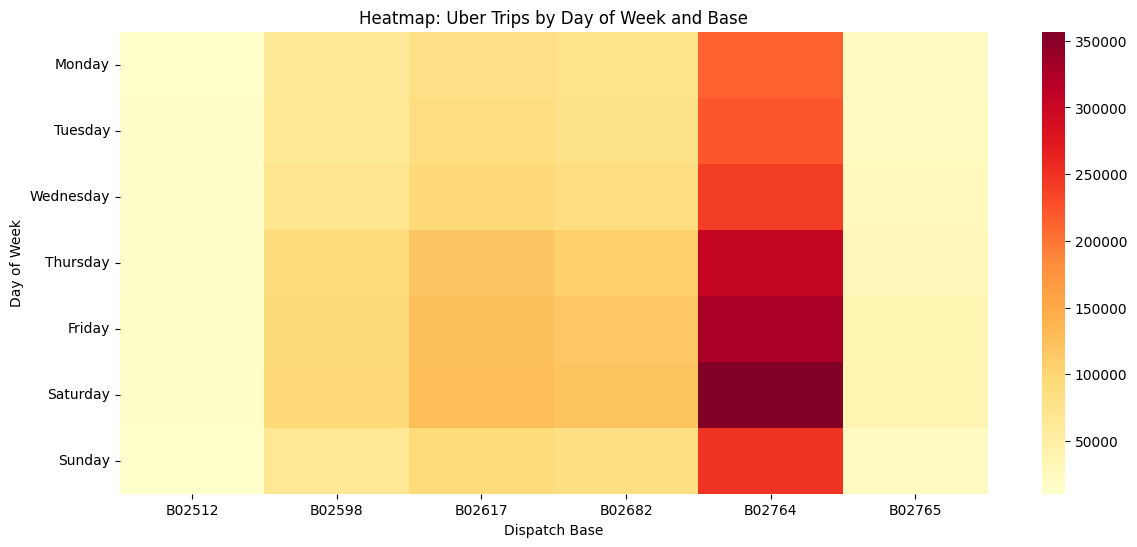

In [7]:
#2
heatmap_data = df.pivot_table(
    index='day_of_week',
    columns='dispatching_base_number',
    values='trips',
    aggfunc='sum'
)

# reorder day order
days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
heatmap_data = heatmap_data.reindex(days)

plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap="YlOrRd")
plt.title("Heatmap: Uber Trips by Day of Week and Base")
plt.ylabel("Day of Week")
plt.xlabel("Dispatch Base")
plt.show()


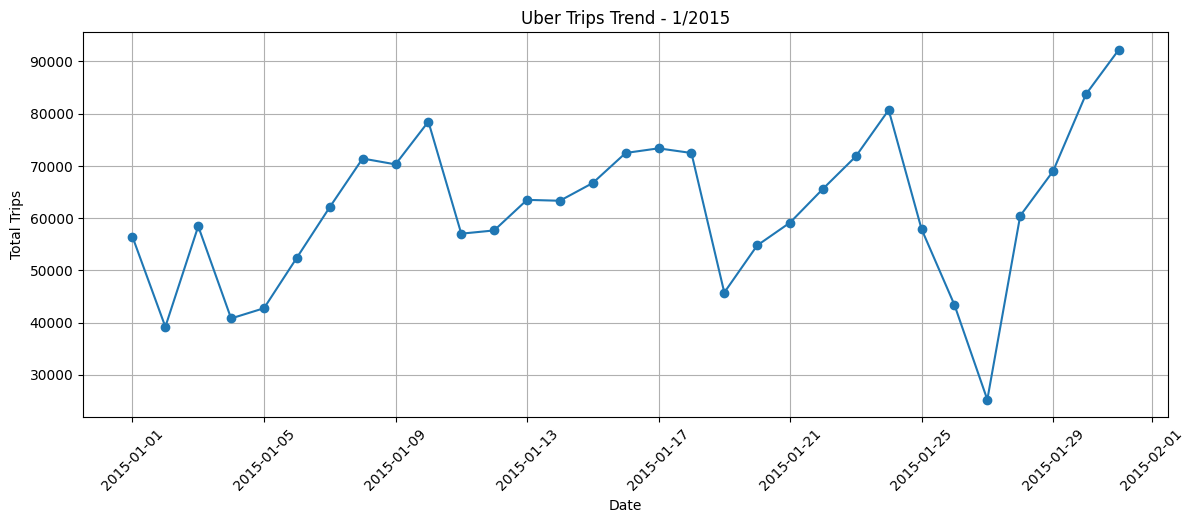

In [8]:
#3
selected_month = 1
selected_year = 2015

monthly_data = df[(df['date'].dt.month == selected_month) &
                  (df['date'].dt.year == selected_year)]

daily_trend = monthly_data.groupby('date')['trips'].sum()

plt.figure(figsize=(14,5))
plt.plot(daily_trend.index, daily_trend.values, marker='o')
plt.title(f"Uber Trips Trend - {selected_month}/2015")
plt.xlabel("Date")
plt.ylabel("Total Trips")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


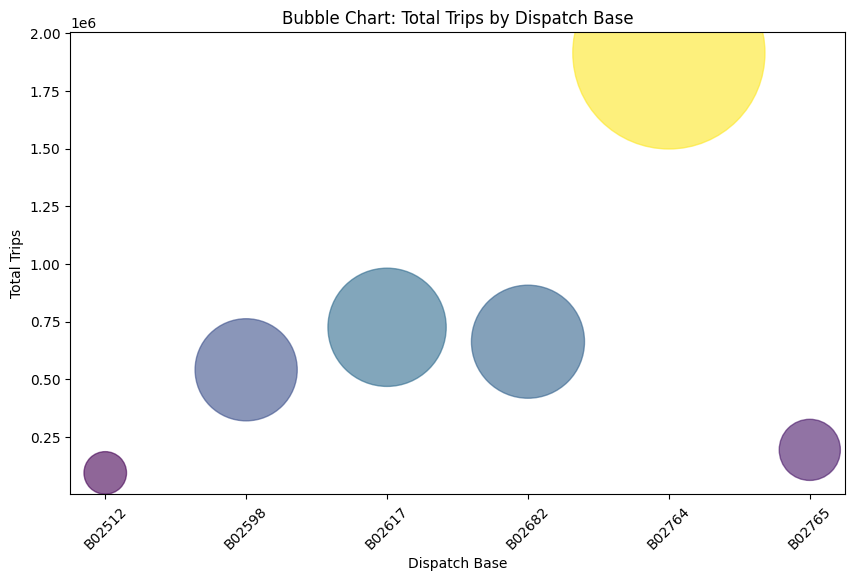

In [9]:
#4
region_totals = df.groupby('dispatching_base_number')['trips'].sum().reset_index()

plt.figure(figsize=(10,6))
plt.scatter(
    region_totals['dispatching_base_number'],
    region_totals['trips'],
    s=region_totals['trips'] * 0.01,   # size scale
    alpha=0.6,
    c=region_totals['trips'],
    cmap='viridis'
)

plt.title("Bubble Chart: Total Trips by Dispatch Base")
plt.xlabel("Dispatch Base")
plt.ylabel("Total Trips")
plt.xticks(rotation=45)
plt.show()
